In [114]:
# https://github.com/penolegrus/mlhomework/blob/master/2%D0%BB%D0%B0%D0%B1%D0%B0/Untitled1.ipynb
#Пендрак Олег БИ-17-2
import math
import numpy as np
import pandas as pd 
from pandas import DataFrame
from random import randint
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics

In [115]:
data=pd.read_csv("./avocado.csv",sep=',', decimal=",") #данные авакадо
del data['Date']
del data['type']
del data['region']
data.head(10)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,2015
4,4,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
5,5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015
6,6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015
7,7,0.98,109428.33,703.75,101815.36,80.0,6829.22,6266.85,562.37,0.0,2015
8,8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015
9,9,1.07,74338.76,842.4,64757.44,113.0,8625.92,8061.47,564.45,0.0,2015


In [116]:
def obuchenie_tryobuchenie_split(obj, obuchenie_percent, Y_column):
    msk = np.random.rand(len(obj)) < obuchenie_percent 
    # Делим на тестовую и обучающую
    obuchenie = obj[msk]
    tryobuchenie = obj[~msk]
    # Отделяем иксы игреки
    Xobuchenie = obuchenie.drop(columns=[Y_column])
    Yobuchenie = obuchenie[Y_column]
    Xtryobuchenie = tryobuchenie.drop(columns=[Y_column])
    Ytryobuchenie = tryobuchenie[Y_column] 
    return Xobuchenie, Yobuchenie, Xtryobuchenie, Ytryobuchenie

In [117]:
#функция для предсказания
def predictRND(obj):
    for index, item in obj.iterrows():
        obj.loc[index,"AveragePrice"] = randint(0,1)
    return obj

data = predictRND(data)
Xobuchenie, Yobuchenie, Xtryobuchenie, Ytryobuchenie = obuchenie_tryobuchenie_split(data, 0.8, 'AveragePrice')

In [118]:
#модели для задания
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
modelTREE = DecisionTreeClassifier(criterion = 'entropy') #дерево решений
modelFOREST = RandomForestClassifier(n_estimators=100) #случайны лес
modelGRADIENT =  GradientBoostingClassifier() #градиентный бустинг

In [119]:
#Обучение модели
modelTREE.fit(Xobuchenie,Yobuchenie)
Ypred = modelTREE.predict(Xtryobuchenie)
#коэф детерминации
classification_report(Ytryobuchenie, Ypred)

'              precision    recall  f1-score   support\n\n           0       0.52      0.50      0.51      1923\n           1       0.49      0.51      0.50      1785\n\n    accuracy                           0.50      3708\n   macro avg       0.50      0.50      0.50      3708\nweighted avg       0.50      0.50      0.50      3708\n'

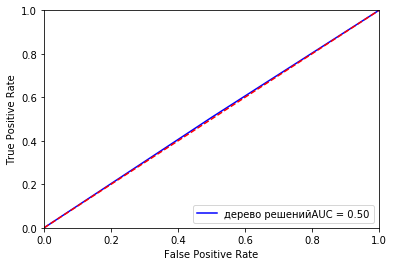

In [120]:
#roc кривые
fpr, tpr, threshold = metrics.roc_curve(Ytryobuchenie, Ypred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label ='дерево решений'+ 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

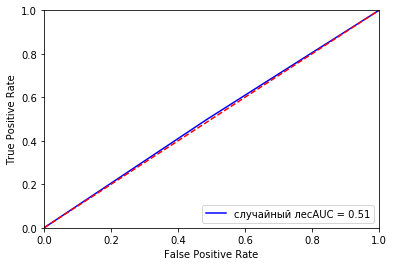

In [121]:
#случайный лес
#Обучение модели
modelFOREST.fit(Xobuchenie,Yobuchenie)
Ypred = modelFOREST.predict(Xtryobuchenie)
#коэф детерминации
classification_report(Ytryobuchenie, Ypred)
#roc кривые
fpr, tpr, threshold = metrics.roc_curve(Ytryobuchenie, Ypred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label ='случайный лес'+ 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

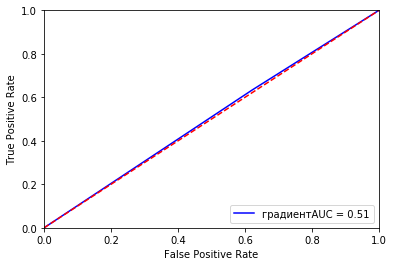

In [122]:
#градиентный бустинг
#Обучение модели
modelGRADIENT.fit(Xobuchenie,Yobuchenie)
Ypred = modelGRADIENT.predict(Xtryobuchenie)
#коэф детерминации
classification_report(Ytryobuchenie, Ypred)
#roc кривые
fpr, tpr, threshold = metrics.roc_curve(Ytryobuchenie, Ypred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label ='градиент'+ 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# я пытался, добавьте балл за песика :)
#░▄▀▄▀▀▀▀▄▀▄░░░░░░░░░
#░█░░░░░░░░▀▄░░░░░░▄░
#█░░▀░░▀░░░░░▀▄▄░░█░█
#█░▄░█▀░▄░░░░░░░▀▀░░█
#█░░▀▀▀▀░░░░░░░░░░░░█
#█░░░░░░░░░░░░░░░░░░█
#█░░░░░░░░░░░░░░░░░░█
#░█░░▄▄░░▄▄▄▄░░▄▄░░█░
#░█░▄▀█░▄▀░░█░▄▀█░▄▀░
#░░▀░░░▀░░░░░▀░░░▀░░░